# Import Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 1. Read Data

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# replace null with 0
data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
from scipy.stats import skew 
for col in data.drop('Outcome', axis =1).columns:
  print("Skewness for the colum {} is {}".format(col,data[col].skew()))

Skewness for the colum Pregnancies is 0.9016739791518588
Skewness for the colum Glucose is 0.5309885349396285
Skewness for the colum BloodPressure is 0.13415273171959252
Skewness for the colum SkinThickness is 0.690619013984192
Skewness for the colum Insulin is 2.166463843812443
Skewness for the colum BMI is 0.5939697505712673
Skewness for the colum DiabetesPedigreeFunction is 1.919911066307204
Skewness for the colum Age is 1.1295967011444805


In [8]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. EDA

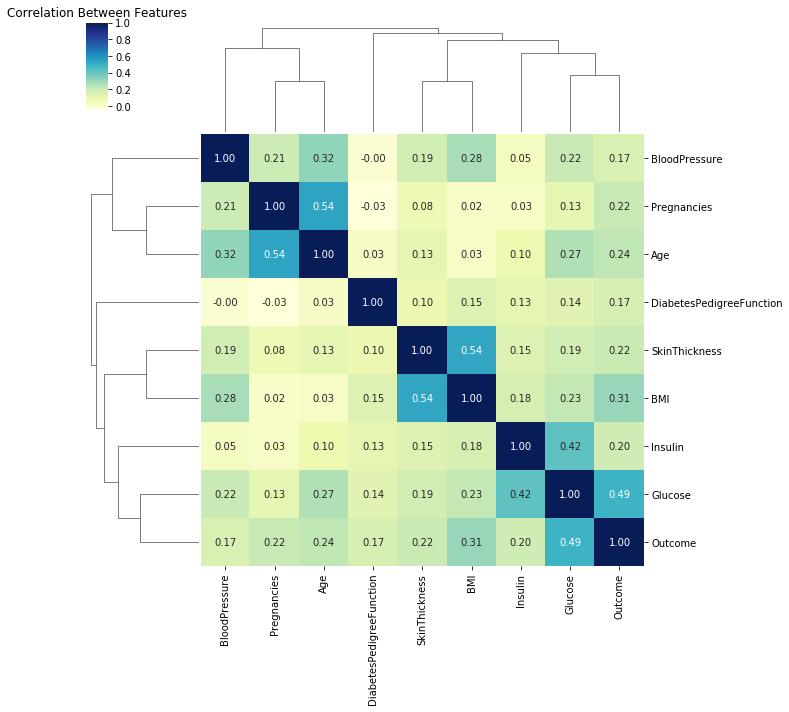

In [10]:
corr_data = data.corr()
sns.clustermap(corr_data, annot=True, cmap = "YlGnBu", fmt = '.2f')
plt.title('Correlation Between Features')
plt.show()

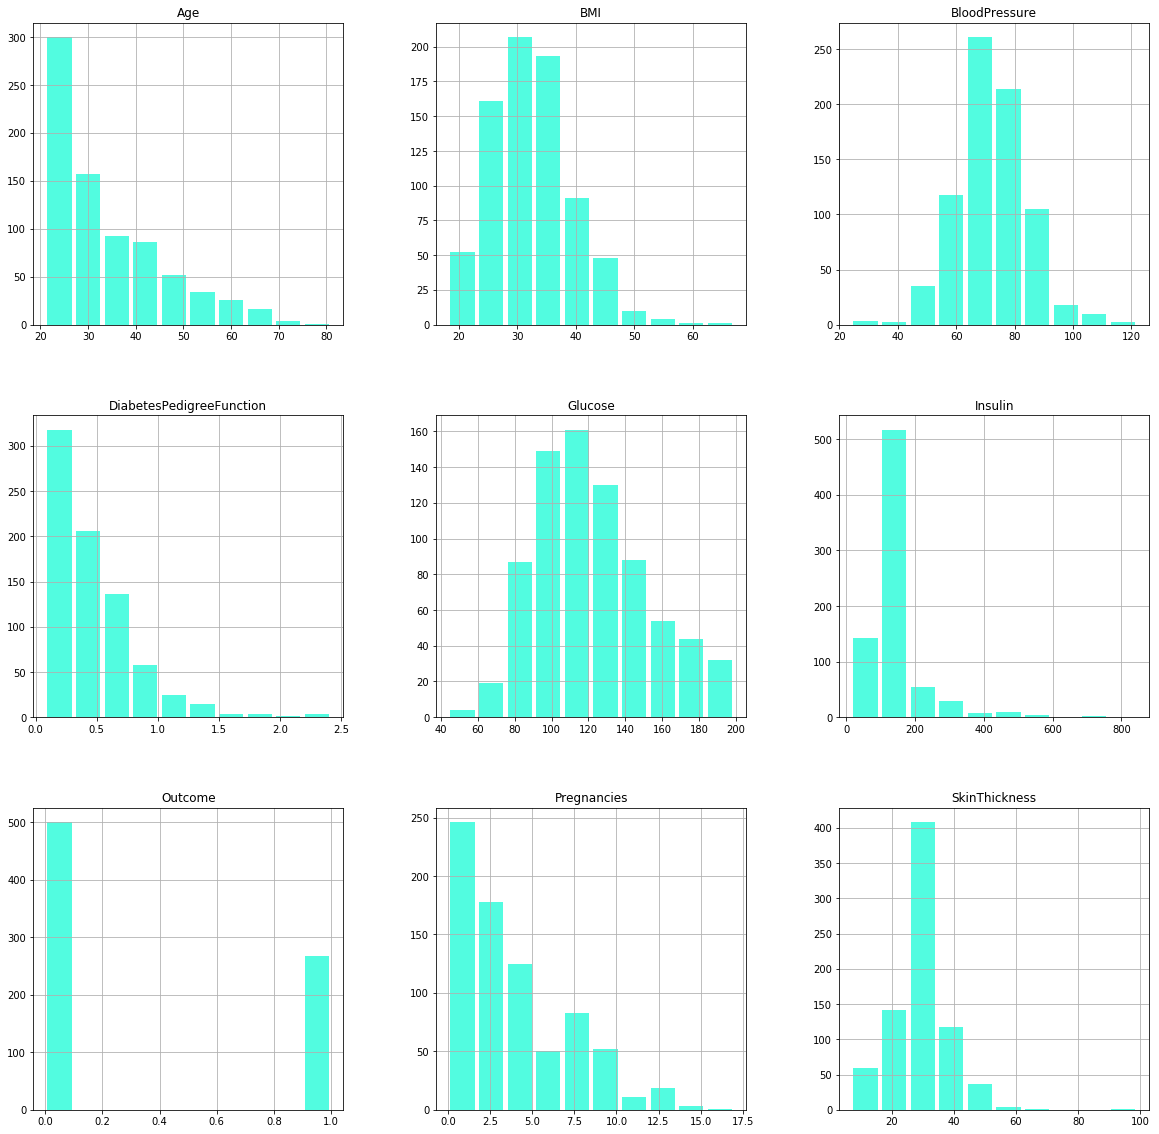

In [11]:
fig = data.hist(figsize = (20,20), color = '#09FBD3', alpha = 0.7, rwidth = 0.85)

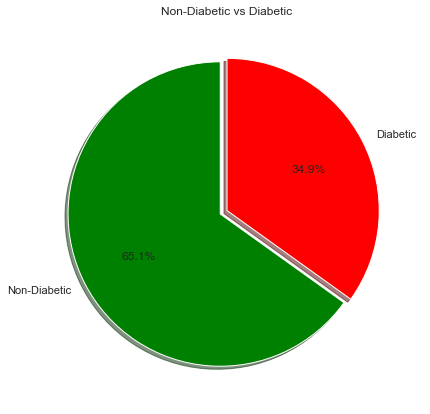

In [12]:
sns.set(style="whitegrid")
labels = ['Non-Diabetic', 'Diabetic']
sizes = data['Outcome'].value_counts(sort = True)

colors = ['green', 'red']
explode = (0.05,0)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels =labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Non-Diabetic vs Diabetic')
plt.show()

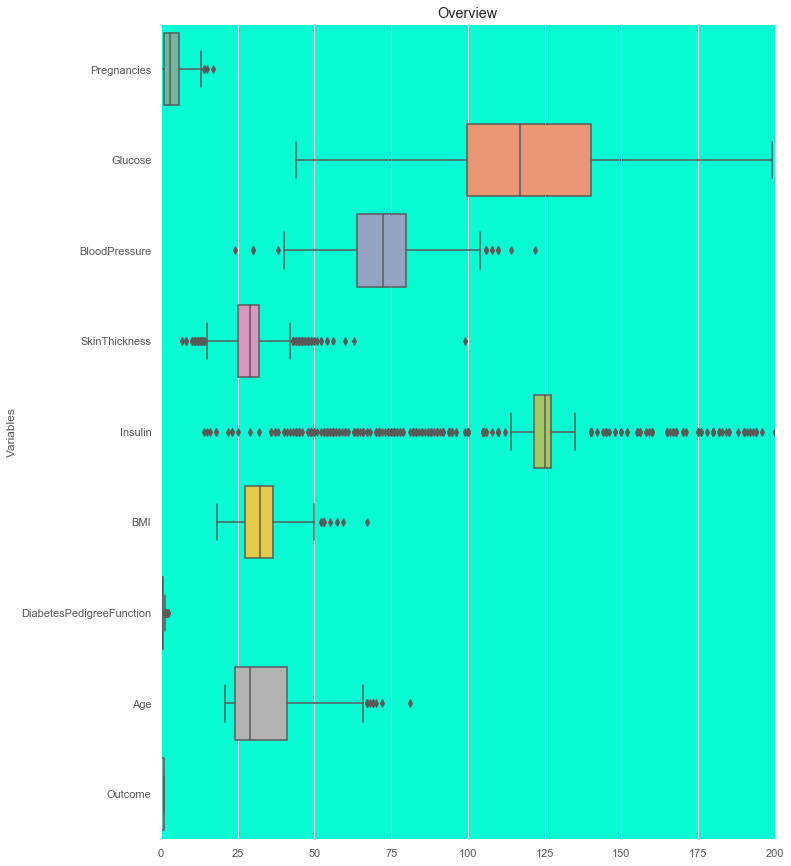

In [13]:
plt.style.use('ggplot') 
# to get an idea of outliers

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#09FBD3')
ax.set(xlim=(-.05,200))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = data, orient = 'h', palette = 'Set2',)

### 2.1 Glucose vs Age

In [14]:
def distplot(col_name):
    plt.figure()
    sns.set(style='whitegrid')
    ax = sns.distplot(data[col_name][data.Outcome == 1], color='gold', rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color = "#09FB03", rug = True)
    plt.legend(['Diabetic', 'Healthy'])

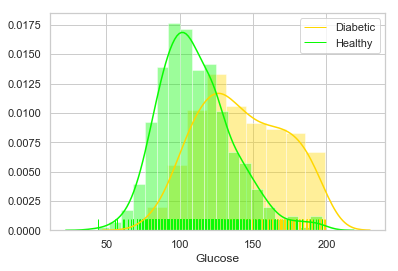

In [15]:
distplot('Glucose')

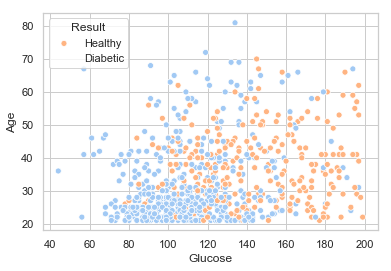

In [16]:
sns.set(style='whitegrid')
g = sns.scatterplot(x='Glucose', y='Age', data = data, hue='Outcome', palette='pastel', legend='full')
plt.legend(title = 'Result', loc='upper left', labels=['Healthy', 'Diabetic'])
plt.show(g)

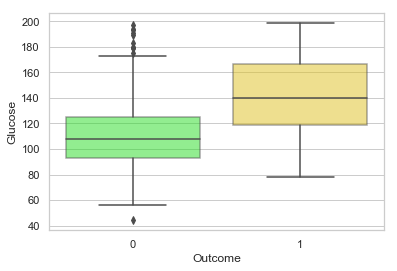

In [17]:
pallete = {0: "#09FB03", 1:"gold"}
sns.boxplot(x = 'Outcome', y= 'Glucose', boxprops=dict(alpha=.5), data = data, palette = pallete)

* It seems like that deabetic people tend to have a higher glucose level.

### 2.2 Pregnancy

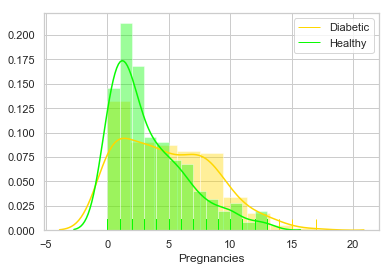

In [18]:
distplot('Pregnancies')

* It can be said that number of pregnancies is high for the diabetic people.

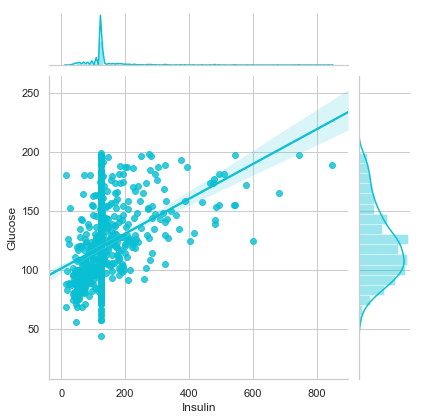

In [19]:
sns.jointplot(x='Insulin', y='Glucose', data=data, kind='reg', color = '#09BFD3')
plt.show()


* It looks like there is positive correlation with Insulin and Glucose.

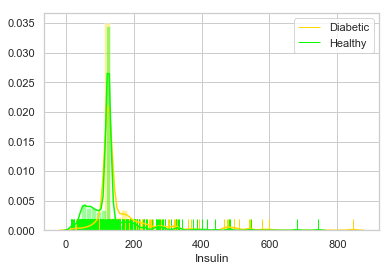

In [20]:
distplot('Insulin')

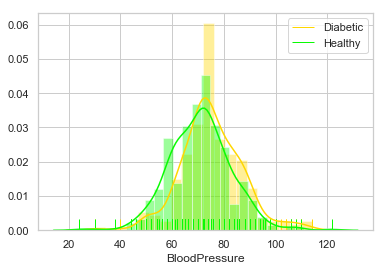

In [21]:
distplot('BloodPressure')

#### Diabetic people tent to have higher blood pressure.

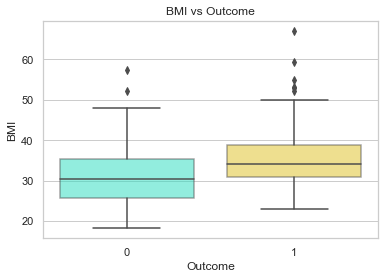

In [22]:
pallete = {0: "#09FBD3", 1:"gold"}
sns.boxplot(x = 'Outcome', y='BMI', boxprops=dict(alpha=.5), data =data, palette = pallete)
plt.title('BMI vs Outcome')
plt.show()

* The median BMI of diabetic people is greater than that of non-diabetic people.

## 3 Modeling

In [23]:
df = data
zero = df[df['Outcome']==0]
one = df[df['Outcome']==1]

from sklearn.utils import resample

# need to upsample that class 1 so that the number of class 1 and class 0 are equal (500)

df_minority_upsampled = resample(one, replace = True, n_samples = 500)

# concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling to avoid particular sequence

In [24]:
df.shape

(1000, 9)

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42, stratify = y)

In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
269,2,146.000000,72.405184,29.15342,125.0,27.500000,0.240,28
385,1,119.000000,54.000000,13.00000,50.0,22.300000,0.205,24
511,0,139.000000,62.000000,17.00000,210.0,22.100000,0.207,21
141,5,106.000000,82.000000,30.00000,125.0,39.500000,0.286,38
55,1,73.000000,50.000000,10.00000,125.0,23.000000,0.248,21
588,3,176.000000,86.000000,27.00000,156.0,33.300000,1.154,52
46,1,146.000000,56.000000,29.15342,125.0,29.700000,0.564,29
425,4,184.000000,78.000000,39.00000,277.0,37.000000,0.264,31
43,9,171.000000,110.000000,24.00000,240.0,45.400000,0.721,54
231,6,134.000000,80.000000,37.00000,370.0,46.200000,0.238,46


In [27]:
y_train

269    1
385    0
511    0
141    0
55     0
588    1
46     0
425    1
43     1
231    1
354    0
611    1
564    0
642    1
43     1
386    1
266    1
663    1
502    1
104    0
420    0
648    1
659    1
468    1
254    1
710    0
750    1
124    1
498    1
93     1
      ..
441    0
502    1
485    1
452    0
685    0
653    0
681    1
75     0
501    0
709    1
586    1
572    0
175    1
60     0
598    1
502    1
318    0
4      1
525    0
79     0
415    1
133    0
686    0
355    1
313    0
748    1
363    1
242    1
519    0
430    0
Name: Outcome, Length: 850, dtype: int64

In [28]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
341,1,95.0,74.000000,21.00000,73.0,25.9,0.673,36
291,0,107.0,62.000000,30.00000,74.0,36.6,0.757,25
674,8,91.0,82.000000,29.15342,125.0,35.6,0.587,68
700,2,122.0,76.000000,27.00000,200.0,35.9,0.483,26
408,8,197.0,74.000000,29.15342,125.0,25.9,1.191,39
409,1,172.0,68.000000,49.00000,579.0,42.4,0.702,28
73,4,129.0,86.000000,20.00000,270.0,35.1,0.231,23
209,7,184.0,84.000000,33.00000,125.0,35.5,0.355,41
626,0,125.0,68.000000,29.15342,125.0,24.7,0.206,21
485,0,135.0,68.000000,42.00000,250.0,42.3,0.365,24


In [29]:
y_test

341    0
291    1
674    0
700    0
408    1
409    1
73     0
209    1
626    0
485    1
750    1
123    0
741    0
422    0
114    1
78     1
61     1
372    0
386    1
709    1
45     1
475    0
233    0
39     1
112    0
630    1
325    0
72     1
535    1
16     1
      ..
207    1
402    1
748    1
463    0
14     1
461    0
698    0
255    1
510    1
527    0
326    1
491    0
561    1
203    0
659    1
579    1
691    1
17     1
160    0
235    1
105    0
359    1
514    0
561    1
273    0
476    1
679    0
40     0
423    0
728    0
Name: Outcome, Length: 150, dtype: int64

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pickle

from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
import seaborn as sns

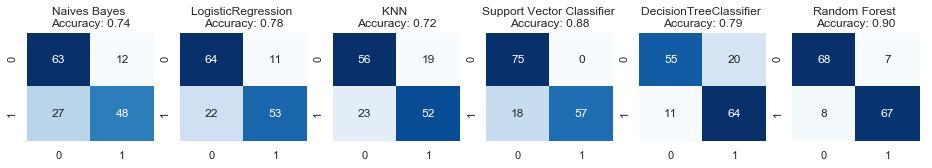

In [34]:
classifiers = {
    "Naives Bayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
    #,"XGBoost": GradientBoostingClassifier()
    }

accuracy = []
cf_matrix = dict.fromkeys(classifiers.keys())

for key, classifier in classifiers.items():
    model = classifier.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append("{:.2f}".format(accuracy_score(y_test, y_pred)))

    # save the model to lcoal storage
    filename = key+".sav"
    pickle.dump(classifier, open(filename, "wb"))


fig, axn = plt.subplots(1,6, sharex=True, figsize=(16,2))

for i, ax in enumerate (axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax, cbar=i==6, annot = True, cmap = "Blues")
    ax.set_title('{:s} \nAccuracy: {:s}'.format(k, accuracy[i]), fontsize =12)

### Testing the saved models

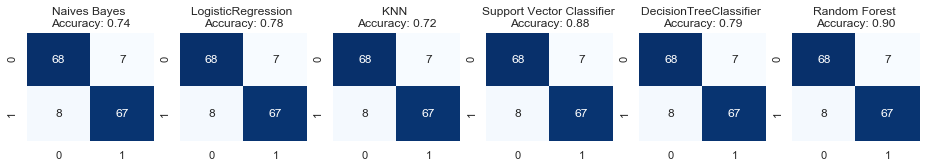

In [35]:


for key, _ in classifiers.items():

    filename = key+".sav"
    # load the model from local storage
    loaded_model = pickle.load(open(filename, 'rb'))
    y_pred = model.predict(X_test)

    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append("{:.2f}".format(accuracy_score(y_test, y_pred)))

fig, axn = plt.subplots(1,6, sharex=True, figsize=(16,2))

for i, ax in enumerate (axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax, cbar=i==6, annot = True, cmap = "Blues")
    ax.set_title('{:s} \nAccuracy: {:s}'.format(k, accuracy[i]), fontsize =12)